# About Aerofit
Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range
including machines such as treadmills, exercise bikes, gym equipment, and fitness
accessories to cater to the needs of all categories of people.

# Business Problem
AeroFit aims to understand the characteristics and behavior of customers who purchased different treadmill products (KP281, KP481, KP781) in the last three months. The goal is to analyze customer demographics, usage patterns, and preferences to support targeted marketing strategies, improve product positioning, and potentially forecast product preference.

# Data Definition

**Product Purchased:**	KP281, KP481, or KP781

**Age:**	In years

**Gender:**	Male/Female

**Education:**	In years

**MaritalStatus:**	Single or partnered

**Usage:**	The average number of times the customer plans to use the treadmill each week.

**Income:**	Annual income (in $)

**Fitness:**	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.

**Miles:**	The average number of miles the customer expects to walk/run each week


#Product Portfolio

*   The KP281 is an entry-level treadmill that sells for 1,500 dollar.
*  The KP481 is for mid-level runners that sell for 1,750 dollar.
*  The treadmill is having advanced features that sell for 2,500 dollar.


# Assumptions

1. **Random Sampling**  
   The data is assumed to be randomly selected from Aerofit’s customer base.

2. **Sample Size & Distribution**  
   Since the sample size is greater than 30, we apply the **Central Limit Theorem (CLT)** which allows us to assume the sampling distribution of the mean is approximately **normal**, regardless of the original distribution of the data.


# Reading the data and Importing Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749"
df = pd.read_csv(url)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


## Inspecting & Handling Data

In [24]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (180, 9)


In [25]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

Data has 180 records and 9 columns.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


There are 3 columns - Gender, Product and Marital Status which are object in nature. They should be converted to categorical datatype before proceeding further

In [27]:
# Converting Product, Gender and Marital Status to Cetegorical Data type

df['Product']=df['Product'].astype('category')
df['Gender']=df['Gender'].astype('category')
df['MaritalStatus']=df['MaritalStatus'].astype('category')

In [28]:
#Check missing values
df.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


There is no missing value in Data

# Visualizing the data

## Summary statistics

In [29]:
print("\nBasic Statistics:")
print(df.describe(include='all'))


Basic Statistics:
       Product         Age Gender   Education MaritalStatus       Usage  \
count      180  180.000000    180  180.000000           180  180.000000   
unique       3         NaN      2         NaN             2         NaN   
top      KP281         NaN   Male         NaN     Partnered         NaN   
freq        80         NaN    104         NaN           107         NaN   
mean       NaN   28.788889    NaN   15.572222           NaN    3.455556   
std        NaN    6.943498    NaN    1.617055           NaN    1.084797   
min        NaN   18.000000    NaN   12.000000           NaN    2.000000   
25%        NaN   24.000000    NaN   14.000000           NaN    3.000000   
50%        NaN   26.000000    NaN   16.000000           NaN    3.000000   
75%        NaN   33.000000    NaN   16.000000           NaN    4.000000   
max        NaN   50.000000    NaN   21.000000           NaN    7.000000   

           Fitness         Income       Miles  
count   180.000000     180.00000

## Customer Profile Based on summary ststistics

1. **Age Group**:  
   - The majority of customers are between **18-50 years** old.

2. **Income Band**:  
   - Most customers have an income between **30,000 and 100,000** dollars annually.

3. **Education Range**:  
   - Customers' **education levels** range from a **minimum of 12 years** to a **maximum of 21 years**.

4. **Fitness Rating**:  
   - Customers have rated their fitness levels on a scale of **1 to 5**, with **1 being poor** and **5 being excellent**.

5. **Usage & Miles**:  
   - On average, customers plan to use the treadmill **2-7 times per week**.  
   - Customers expect to **run/walk between 21 and 360 miles per week**.

6. **Average Customer Profile**:  
   - **Age**: 28 years  
   - **Education**: 15 years  
   - **Fitness Level**: 3 (on a scale of 1 to 5)  
   - **Usability**: 3 (on a scale of 1 to 5)
   - **Annual Income**: $54,000  
   - **Miles Run/Walked per Week**: 103 miles

7. **Median Customer Profile**:  
   - **Age**: 26 years  
   - **Education**: 16 years  
   - **Usability**: 3 (on a scale of 1 to 5)  
   - **Fitness Level**: 3 (on a scale of 1 to 5)  
   - **Miles Run/Walked per Week**: 94 miles


### Non Graphical analysis

In [30]:
# Example: Product distribution
print(df['Product'].value_counts())

# Gender distribution
print(df['Gender'].value_counts())

# Marital status distribution
print(df['MaritalStatus'].value_counts())

# Marital Fitness distribution
print(df['Fitness'].value_counts())

# Marital Usage distribution
print(df['Usage'].value_counts())

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64
Gender
Male      104
Female     76
Name: count, dtype: int64
MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64
Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64
Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: count, dtype: int64


<ipython-input-31-352c50d66dda>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Gender', 'MaritalStatus'])['Product']


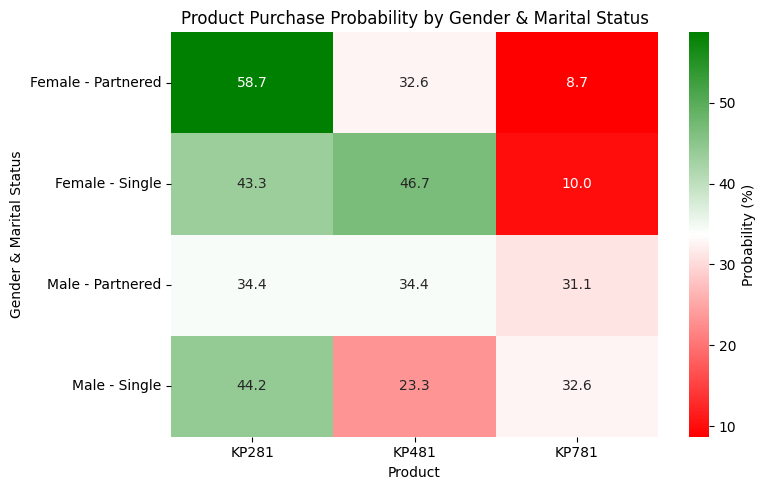

In [31]:
from matplotlib.colors import LinearSegmentedColormap
# Prepare data
heatmap_data = (
    df.groupby(['Gender', 'MaritalStatus'])['Product']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0) * 100
)
heatmap_data.index = heatmap_data.index.map(lambda x: f"{x[0]} - {x[1]}")

# Custom green-red palette
green_red = LinearSegmentedColormap.from_list("GreenRed", ["red", "white", "green"])

# Plot
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, cmap=green_red, fmt=".1f", cbar_kws={'label': 'Probability (%)'})
plt.title('Product Purchase Probability by Gender & Marital Status')
plt.xlabel('Product')
plt.ylabel('Gender & Marital Status')
plt.tight_layout()
plt.show()

### 🎯 Heatmap-Based Insights: Product Preference by Gender & Marital Status

- ✅ **KP281** is most preferred by **partnered females**, followed by **single males**.  
  > Indicates strong appeal among women in relationships and younger independent males.

- ✅ **KP481** is most frequently chosen by **single females**, followed by **partnered males**.  
  > Suggests balanced popularity across genders, slightly leaning toward individuals who may be exercising independently or with partners.

- ❌ **KP781** is the **least preferred by females**, whether single or partnered.  
  > This product doesn’t currently resonate with the female customer segment.


## Univariate Analysis

### Choosing a color pallete for products for analysis

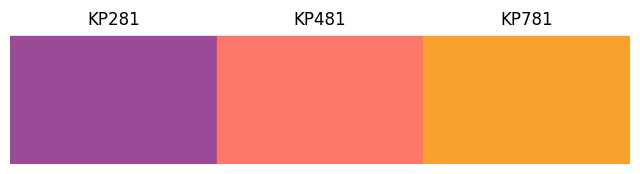

In [32]:
import matplotlib.pyplot as plt

# Define the custom fitness color palette and product names
product_palette = {'KP281': '#9B4A97FF', 'KP481': '#FC766AFF', 'KP781': '#F9A12EFF'}
gender_palette = {'Male': '#1E90FF', 'Female': '#FF69B4'}
marital_palette  = ['#FFA177FF', '#FCF951FF']

product_names = ['KP281', 'KP481', 'KP781']

# Create a figure
plt.figure(figsize=(8, 2))

# Plot each product's color as a rectangular block
for i, (name, color) in enumerate(product_palette.items()):
    plt.gca().add_patch(plt.Rectangle((i, 0), 1, 1, color=color))  # Add rectangle with edges

# Add text labels for the product names above each rectangle
for i, name in enumerate(product_names):
    plt.text(i + 0.5, 1.05, name, ha='center', va='bottom', fontsize=12, color='black')

# Adjust limits to fit the blocks
plt.xlim(0, len(product_palette))
plt.ylim(0, 1.2)  # Set the height for the rectangles

# Remove axis ticks and labels
plt.axis('off')

plt.show()


### Analyzing Discrete Variables: Product, Gender and Marital Status

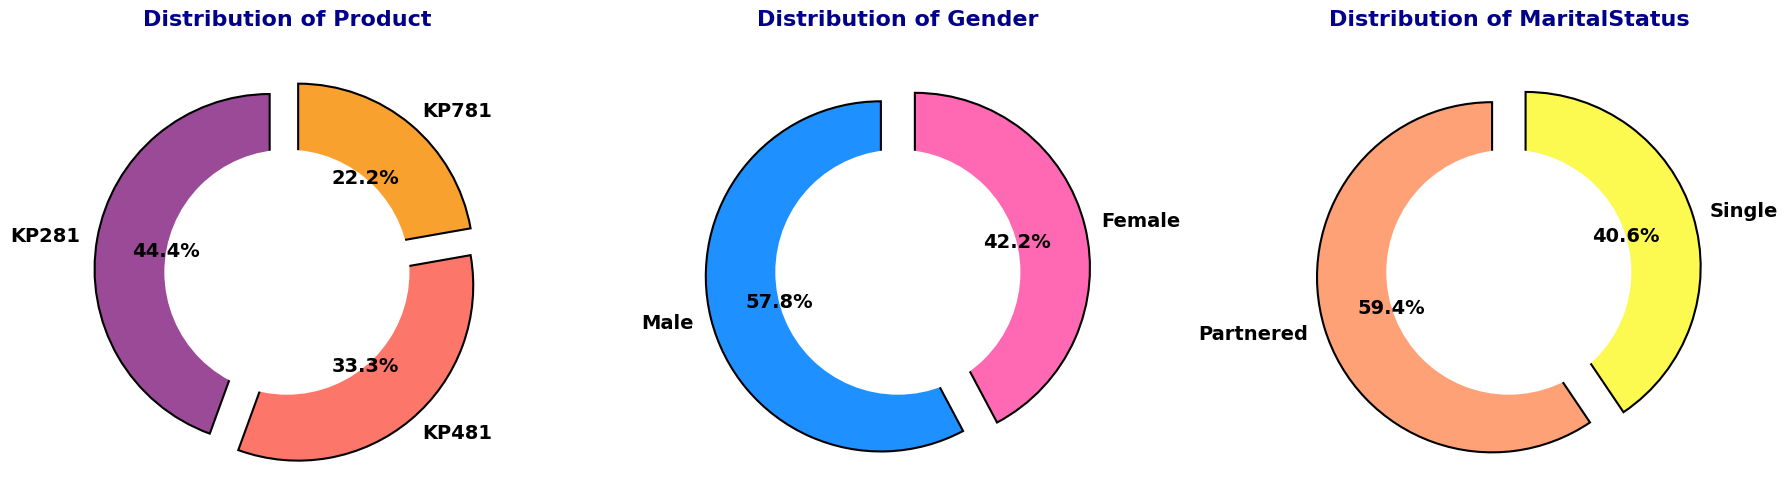

In [33]:
# List of categorical variables
categorical_vars = ['Product', 'Gender', 'MaritalStatus']

# Plotting setup (side-by-side donut charts)
plt.figure(figsize=(18, 6))

# Loop through each categorical variable and create a donut chart
for i, cat_col in enumerate(categorical_vars):
    plt.subplot(1, 3, i + 1)  # Arrange subplots in 1 row, 3 columns

    # Get the value counts for each category
    counts = df[cat_col].value_counts()

    # Define colors based on the category
    if cat_col == 'Product':
        colors = list(product_palette.values())  # Use hex values from the palette
    elif cat_col == 'Gender':
        colors = list(gender_palette.values())  # Use hex values from the palette
    elif cat_col == 'MaritalStatus':
        colors = marital_palette  # Use predefined color list for marital status

    # Plotting the donut chart
    wedges, texts, autotexts = plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90,
                                       colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'linestyle': 'solid'},
                                       explode=[0.1] * len(counts), shadow=False)

    # Add a white circle in the center to make it a donut chart
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    plt.gca().add_artist(centre_circle)

    # Title customization
    plt.title(f'Distribution of {cat_col}', fontsize=16, fontweight='bold', color='darkblue', pad=20)

    # Customize label and percentage sizes for better readability
    for text in autotexts + texts:
        text.set_fontsize(14)
        text.set_fontweight('bold')
        text.set_color('black')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

### Key Observations:

1. **Product Popularity**:
   - **KP281** is the most popular, while **KP781** is the least popular.

2. **Gender Preferences**:
   - **Males** tend to buy more than **females**, suggesting a need for targeted marketing.

3. **Marital Status**:
   - **Partnered individuals** buy more, possibly due to shared fitness goals.


## Analyzing distribution of Age and Income

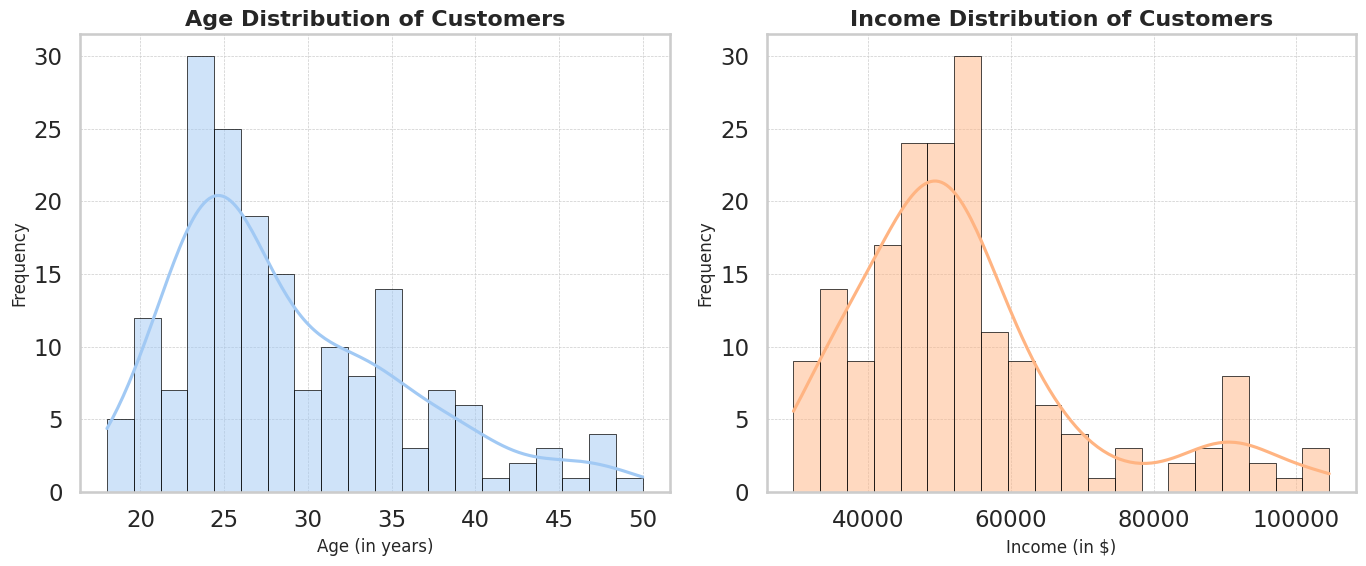

In [34]:

# Set Seaborn style and context
sns.set(style='whitegrid', context='talk')

# Create the figure
plt.figure(figsize=(14, 6))

# Custom colors
age_color = '#A1C9F4'     # Soft blue
income_color = '#FFB482'  # Soft orange

# Plotting Age Distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True, color=age_color, edgecolor='black', linewidth=0.5)
plt.title('Age Distribution of Customers', fontsize=16, fontweight='bold')
plt.xlabel('Age (in years)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

# Plotting Income Distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Income'], bins=20, kde=True, color=income_color, edgecolor='black', linewidth=0.5)
plt.title('Income Distribution of Customers', fontsize=16, fontweight='bold')
plt.xlabel('Income (in $)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

# Adjust layout
plt.tight_layout()
plt.show()


### Age and Income Insights

- **Both Age and Income histograms are right-skewed**, indicating that:
  - The majority of customers are relatively **young**.
  - Most of them have an **average income** range.
  - There is also a **small peak around $90,000 income**, suggesting a minor high-income segment.

This suggests that the **young population with moderate income** is the primary customer base for AeroFit products, with a small presence of higher-income individuals as well.


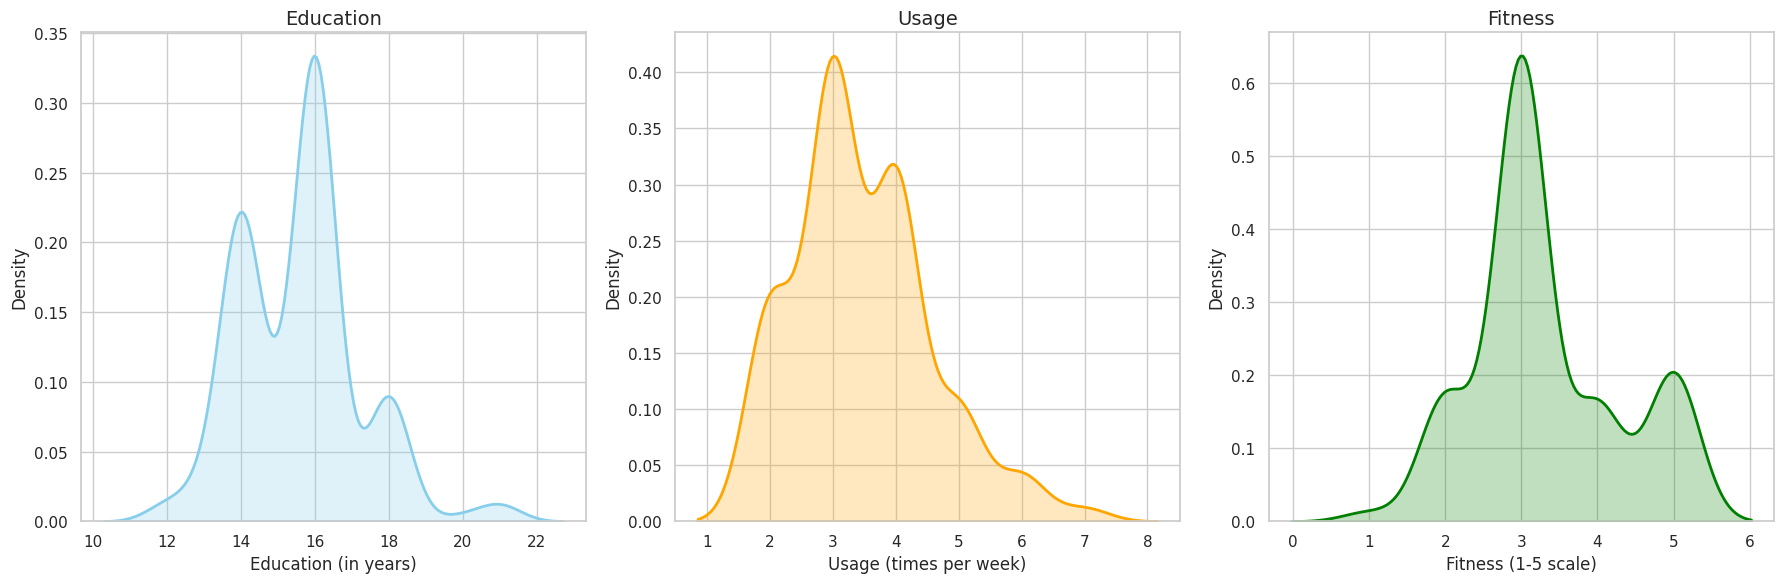

In [35]:
# Set plot style
sns.set(style='whitegrid')

# Create a figure with 1 row and 3 columns
plt.figure(figsize=(18, 6))

# Plotting Education
plt.subplot(1, 3, 1)  # 1 row, 3 columns, plot 1
sns.kdeplot(df['Education'], fill=True, color='skyblue', lw=2)
plt.title('Education', fontsize=14)
plt.xlabel('Education (in years)')
plt.ylabel('Density')

# Plotting Usage
plt.subplot(1, 3, 2)  # 1 row, 3 columns, plot 2
sns.kdeplot(df['Usage'], fill=True, color='orange', lw=2)
plt.title('Usage', fontsize=14)
plt.xlabel('Usage (times per week)')
plt.ylabel('Density')

# Plotting Fitness
plt.subplot(1, 3, 3)  # 1 row, 3 columns, plot 3
sns.kdeplot(df['Fitness'], fill=True, color='green', lw=2)
plt.title('Fitness', fontsize=14)
plt.xlabel('Fitness (1-5 scale)')
plt.ylabel('Density')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

### Key Insights from Education, Usage, and Fitness Distributions

- **Education** peaks at **16 years**, suggesting many customers are college. graduates.
-The second highest peak is at 14 years, and the third highest at 18 years, showing three distinct peaks and suggesting a diverse educational background among customers.


> Most customers have studied for about 16 years, which means many of them are college graduates. This shows they understand the value of fitness and can be reached through smart and informative ads.


- **Usage** shows:
  - A **major peak** at **3 times per week**, indicating this is the most common usage frequency.
  - A **smaller peak** at **4 times per week**, showing some customers are slightly more active.
- **Fitness Rating**:
  - A **large peak** at **rating 3**, suggesting most customers consider themselves moderately fit.
  - A **smaller peak** at **rating 5**, indicating a minority of highly fit individuals.


## Bivariate Analysis

<ipython-input-36-2f12bcf9de2c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-36-2f12bcf9de2c>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


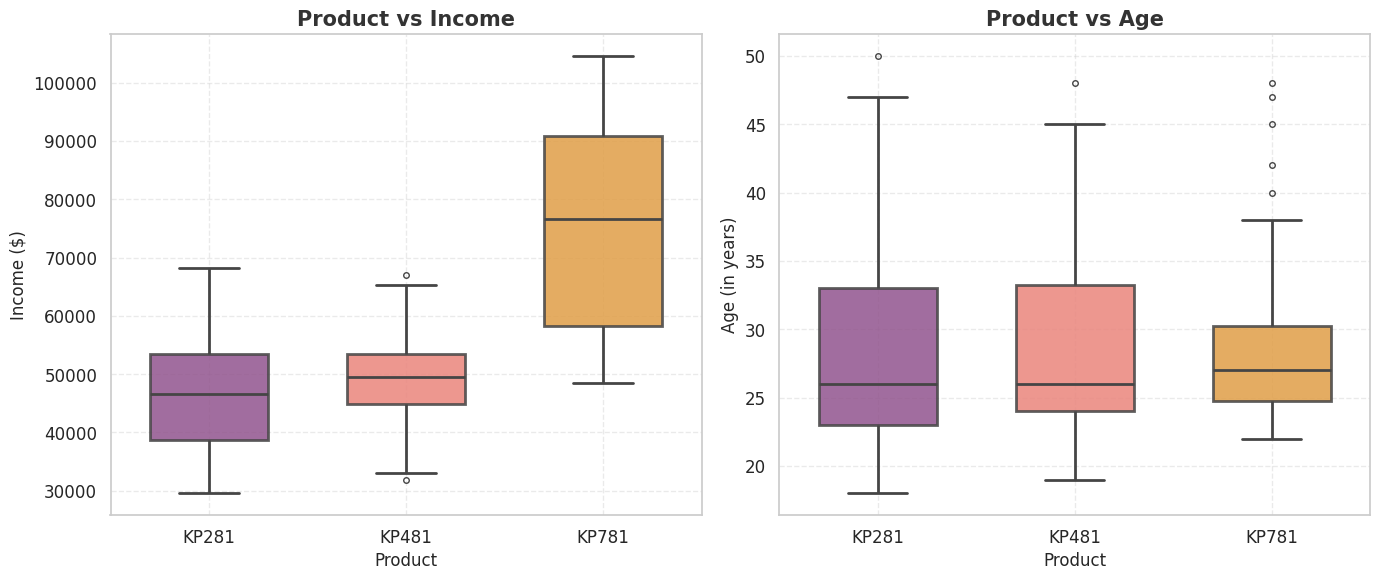

In [36]:
# Set plot style
sns.set(style='whitegrid', font_scale=1.1)

# Create the figure
plt.figure(figsize=(14, 6))  # 2 plots side-by-side

# Product vs Income
plt.subplot(1, 2, 1)
sns.boxplot(
    x='Product', y='Income', data=df, palette=product_palette,
    width=0.6, linewidth=2, fliersize=4,
    boxprops=dict(alpha=0.85)
)
plt.title('Product vs Income', fontsize=15, fontweight='bold', color='#333333')
plt.xlabel('Product', fontsize=12)
plt.ylabel('Income ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)

# Product vs Age
plt.subplot(1, 2, 2)
sns.boxplot(
    x='Product', y='Age', data=df, palette=product_palette,
    width=0.6, linewidth=2, fliersize=4,
    boxprops=dict(alpha=0.85)
)
plt.title('Product vs Age', fontsize=15, fontweight='bold', color='#333333')
plt.xlabel('Product', fontsize=12)
plt.ylabel('Age (in years)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)

# Layout and display
plt.tight_layout()
plt.show()


### 📊 **Product-wise Customer Profile (Income & Age)**

- **KP281**:  
  - 💰 **Income Range**: $40,000 – $55,000  
  - 🎂 **Age Range**: 23 – 33 years

- **KP481**:  
  - 💰 **Income Range**: $45,000 – $55,000  
  - 🎂 **Age Range**: 24 – 34 years

- **KP781**:  
  - 💰 **Income Range**: $59,000 – $90,000  
  - 🎂 **Age Range**: 25 – 30 years

  > **Note**: A lot of outliers in the higher age group.

  Customers buying the KP781 have the highest median income and the most variability in income. The KP781 group has a more noticeable presence of older customers (the high-age outliers) compared to the other two products. This suggests that while the typical age might be similar, older individuals are more likely to purchase the higher-end KP781 model.

> 📌 People who buy the KP781 usually earn more and are often in their late 20s. They are serious about fitness and want good quality and advanced features in their treadmill.*


###Trends in Education, usage, fitness basis gender and product

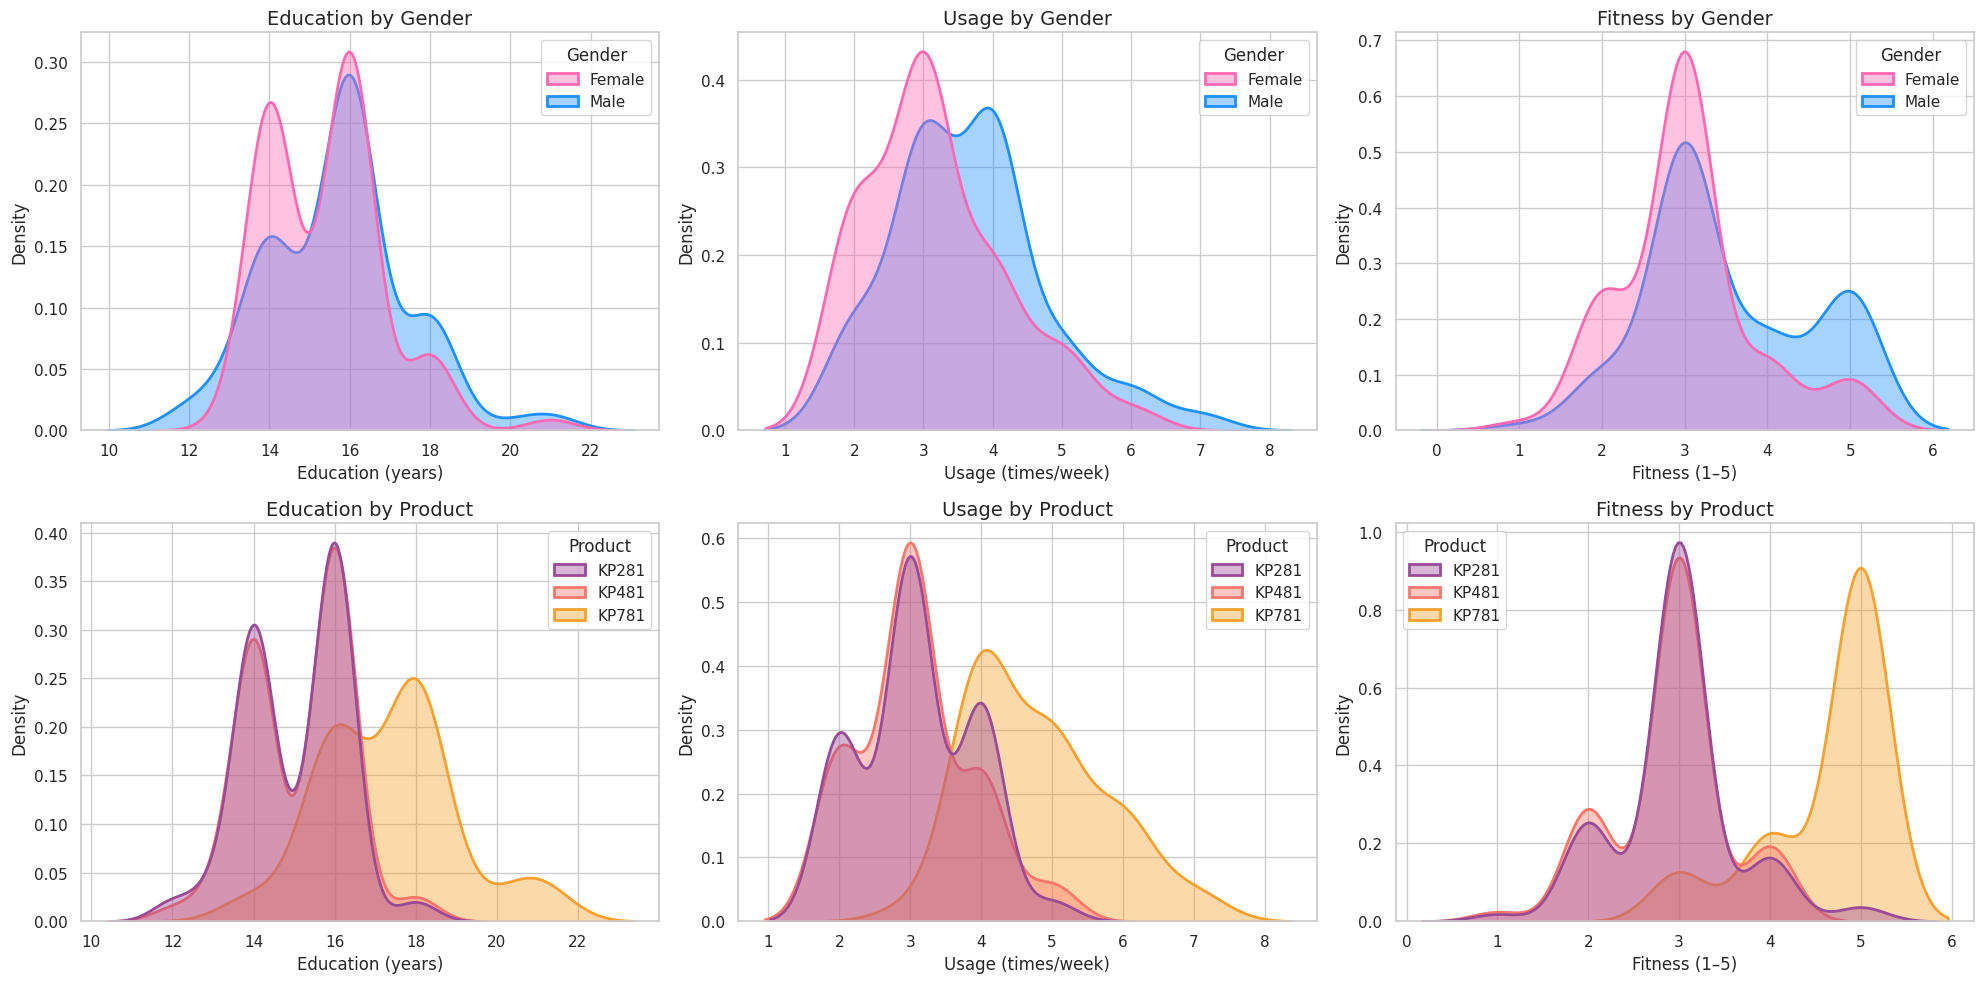

In [37]:
# Set plot style
sns.set(style='whitegrid')

# Create a figure with 2 rows and 3 columns
plt.figure(figsize=(20, 10))

# KDE by Gender
plt.subplot(2, 3, 1)
sns.kdeplot(data=df, x='Education', hue='Gender', fill=True, common_norm=False, alpha=0.4, lw=2, palette=gender_palette)
plt.title('Education by Gender', fontsize=14)
plt.xlabel('Education (years)')
plt.ylabel('Density')

plt.subplot(2, 3, 2)
sns.kdeplot(data=df, x='Usage', hue='Gender', fill=True, common_norm=False, alpha=0.4, lw=2, palette=gender_palette)
plt.title('Usage by Gender', fontsize=14)
plt.xlabel('Usage (times/week)')
plt.ylabel('Density')

plt.subplot(2, 3, 3)
sns.kdeplot(data=df, x='Fitness', hue='Gender', fill=True, common_norm=False, alpha=0.4, lw=2, palette=gender_palette)
plt.title('Fitness by Gender', fontsize=14)
plt.xlabel('Fitness (1–5)')
plt.ylabel('Density')

# KDE by Product
plt.subplot(2, 3, 4)
sns.kdeplot(data=df, x='Education', hue='Product', fill=True, common_norm=False, alpha=0.4, lw=2, palette=product_palette)
plt.title('Education by Product', fontsize=14)
plt.xlabel('Education (years)')
plt.ylabel('Density')

plt.subplot(2, 3, 5)
sns.kdeplot(data=df, x='Usage', hue='Product', fill=True, common_norm=False, alpha=0.4, lw=2, palette=product_palette)
plt.title('Usage by Product', fontsize=14)
plt.xlabel('Usage (times/week)')
plt.ylabel('Density')

plt.subplot(2, 3, 6)
sns.kdeplot(data=df, x='Fitness', hue='Product', fill=True, common_norm=False, alpha=0.4, lw=2, palette=product_palette)
plt.title('Fitness by Product', fontsize=14)
plt.xlabel('Fitness (1–5)')
plt.ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()


### Key Insights:

1. **Education and Gender Trends:**
   - **Females** with **14-16 years of education** are more frequent buyers.
   - **Males** with **14-18 years of education** tend to buy more.

2. **Usage Frequency:**
   - **Females** show a **sharp peak** at **3 times per week**, while **males** use the product **more frequently**, at **3-4 times per week**.

3. **Fitness Rating Trends:**
   - **Females** rate their fitness between **2-3**, while **males** rate it between **3-5**, indicating fitter males are more likely to buy the product.

4. **Product Preferences:**
   - People with **higher education** and **more frequent usage** tend to buy **KP781**.
   - Customers who rate themselves **5 in fitness** also prefer **KP781**.

Overall, **KP781** appeals to individuals with higher education, higher usage frequency, and fitness levels, especially among males.

## Multivariate Analysis

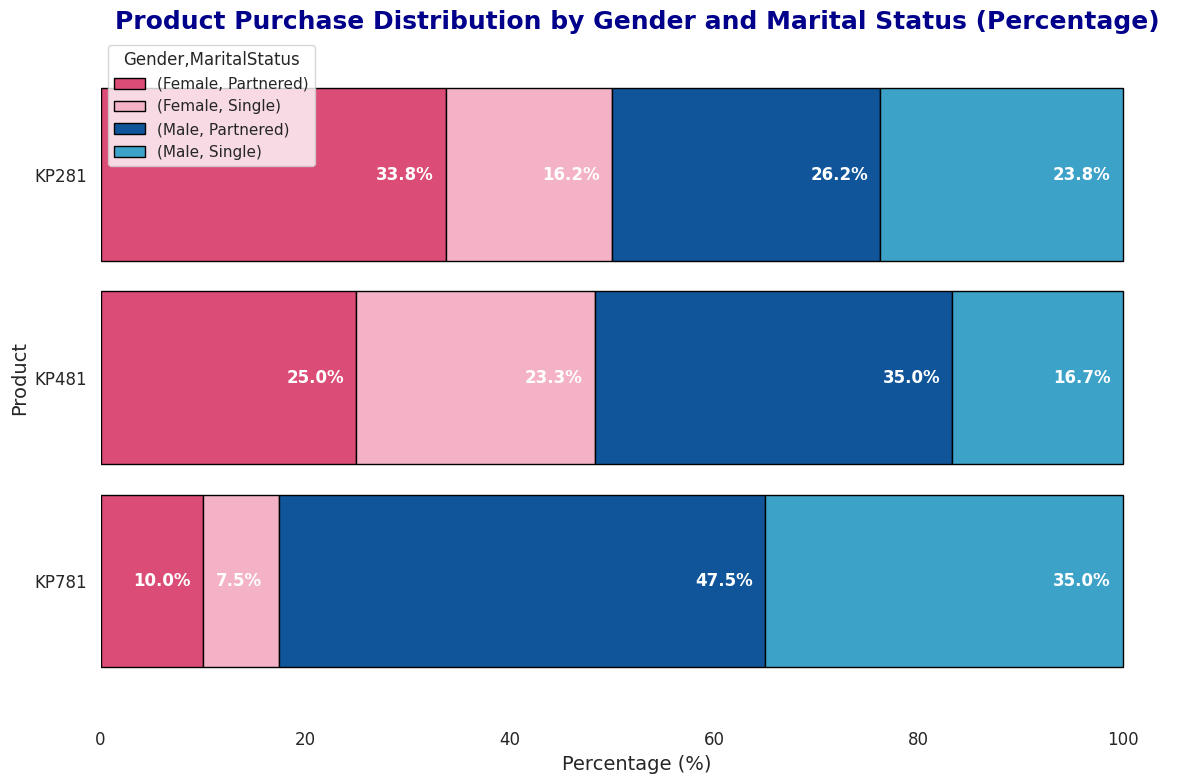

In [43]:
# Cross-tabulate Product, Gender, and Marital Status
gender_marital_product_ct = pd.crosstab([df['Gender'], df['MaritalStatus']], df['Product'])

# Normalize the values to get percentages based on each product (column)
gender_marital_product_ct_percent = gender_marital_product_ct.div(gender_marital_product_ct.sum(axis=0), axis=1) * 100

# Reverse the order of the columns (products on x-axis)
gender_marital_product_ct_percent = gender_marital_product_ct_percent[gender_marital_product_ct_percent.columns[::-1]]

# Define colors for gender and marital status
colors = {
    'Female': {'Single': '#F4B2C6', 'Partnered': '#DB4C77'},
    'Male': {'Single': '#3CA2C8', 'Partnered': '#10559A'}
}

# Assign colors
color_list = []
for (gender, marital_status) in gender_marital_product_ct_percent.index:
    color_list.append(colors[gender][marital_status])

# Plot: Horizontal Stacked Bar Chart
ax = gender_marital_product_ct_percent.T.plot(
    kind='barh', stacked=True, figsize=(12, 8),
    color=color_list, edgecolor='black', width=0.85
)

# Add percentage labels
for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.text(p.get_x() + width - 4, p.get_y() + p.get_height() / 2,
                f'{width:.1f}%', ha='center', va='center', color='white',
                fontsize=12, fontweight='bold')

# Style
plt.title('Product Purchase Distribution by Gender and Marital Status (Percentage)', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('Product', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Remove gridlines and spines
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()


### **Key Insights on Product Preferences**:

- **KP281** is predominantly preferred by **partnered females**, followed by **single males**. This suggests that **partnered females** are more likely to purchase an entry-level product, possibly due to the simplicity and cost-effectiveness of KP281.

- **KP481** is favored more by **partnered individuals** than by **single people**. This could imply that **couples or those in relationships** prefer mid-level products for shared fitness goals and more frequent usage.

- **KP781**, the higher-end product, is somewhat equally distributed across **both genders** but is **significantly less preferred by females**. This suggests that the **advanced features** and possibly the **higher price point** of KP781 appeal more to **male customers**, who tend to value premium products more.


###Pairplot

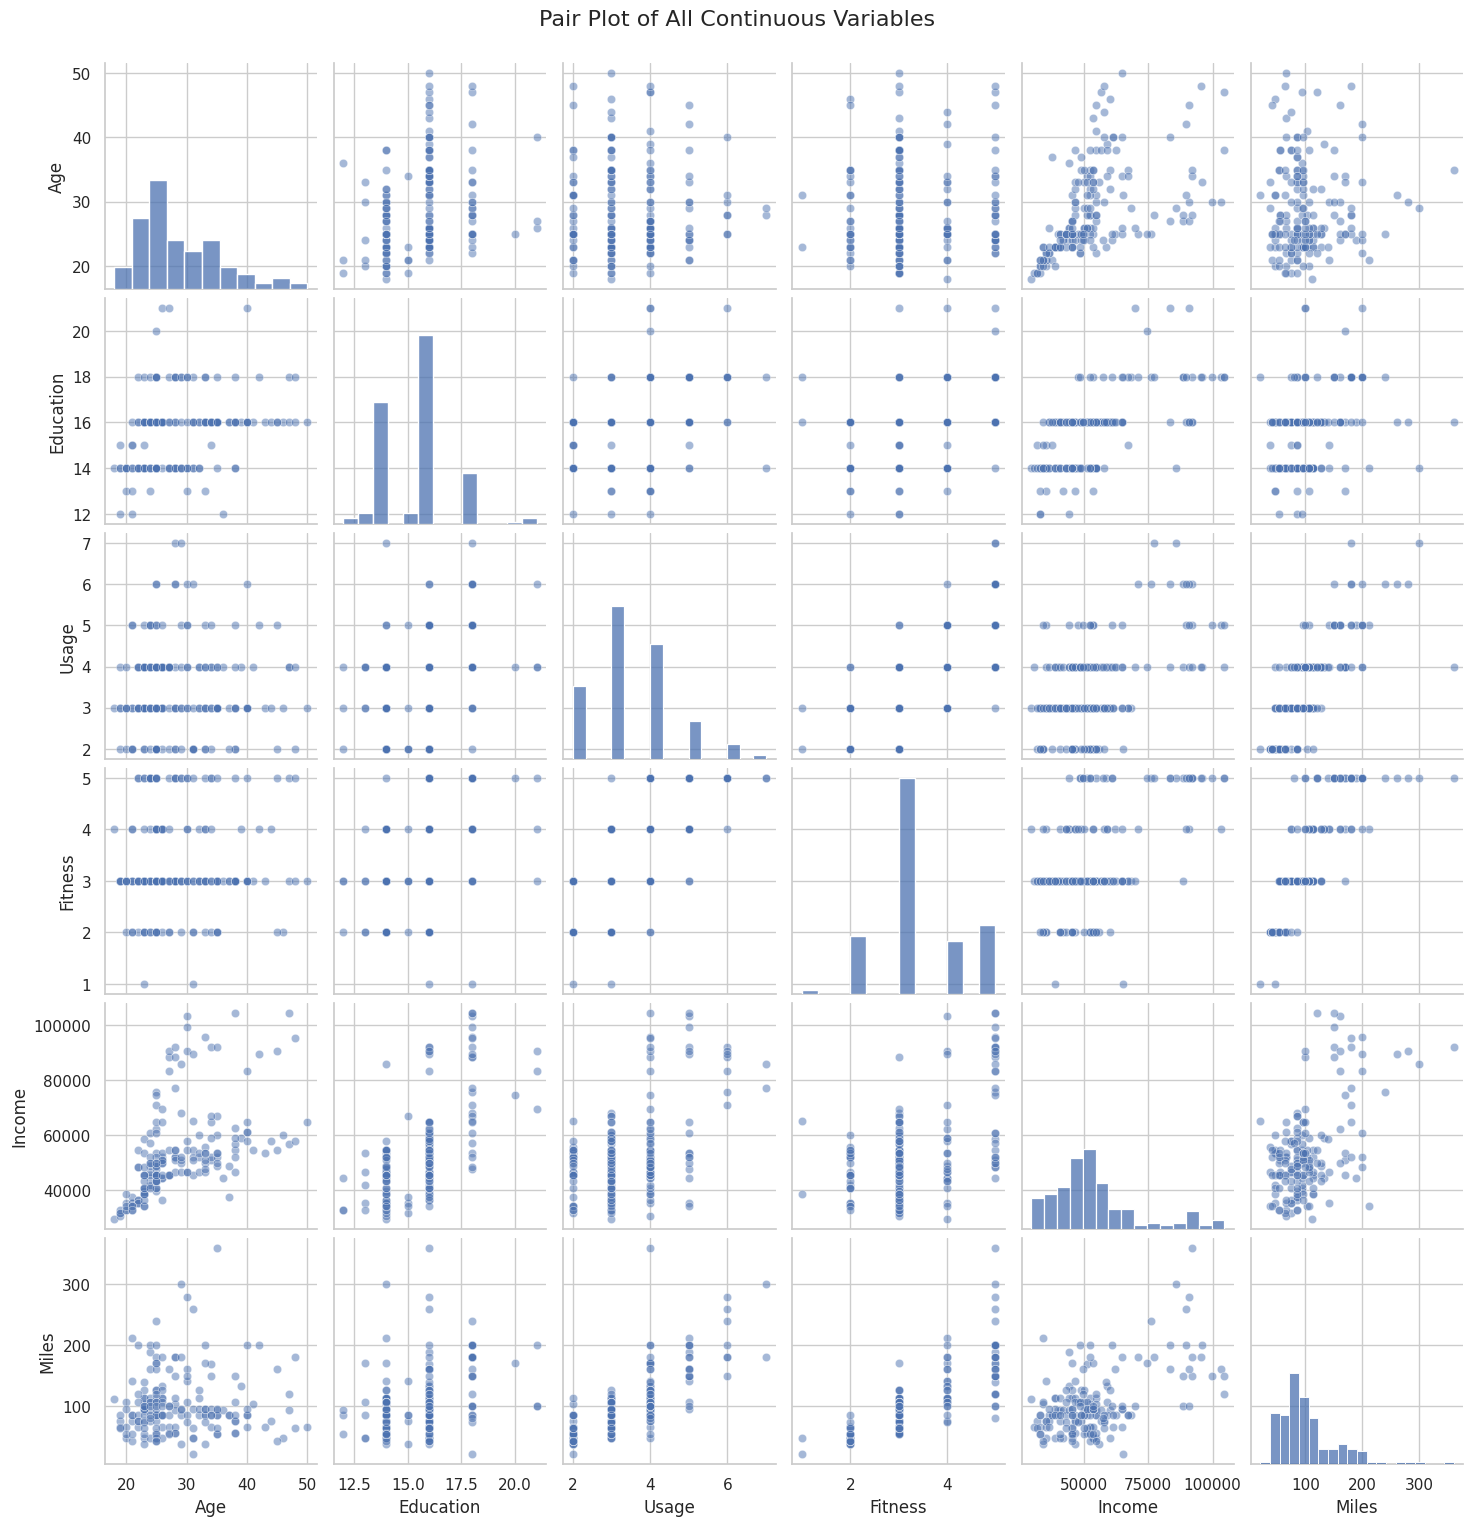

In [39]:
# Selecting only continuous variables for pairplot
continuous_vars = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Creating the pairplot
sns.pairplot(df[continuous_vars], height=2.5, diag_kind='hist', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of All Continuous Variables', y=1.02, fontsize=16)
plt.show()

There is a positive correlation between income and miles, indicating that higher-income individuals tend to plan more intense treadmill usage. Similarly, income and age show a mild positive relationship, suggesting older customers generally have higher incomes. Also, fitness level positively correlates with usage frequency, implying that fitter individuals are more consistent in their workout routines. These insights can guide targeted marketing by aligning product features and promotions with lifestyle intensity and income levels.

# 🔑 Insights Summary

1. **Customer Demographics & Preferences**:
   - **KP281:** Preferred by partnered females (simplicity, cost-effectiveness) and single males (accessibility, affordability). Targeted at young adults (23-33), especially college students and recent graduates.
   - **KP481:** Popular with couples (24-34 years), seeking shared fitness goals and more advanced features. A step up from KP281.
   - **KP781:** Favored by high-income males, tech-savvy professionals, and fitness enthusiasts who value premium features.

2. **Key Correlations**:
   - Income positively correlates with more frequent usage and miles on the treadmill, with higher income groups preferring premium models.
   - Fitness beginners favor entry-level models, while more experienced users opt for mid-range or premium models.

3. **Gender Insights**:
   - Males prefer premium models for advanced features.
   - Females lean towards affordable, easy-to-use models like KP281 and KP481.

4. **Trends**:
   - Younger customers (under 34) prefer entry-level or mid-range models due to budget and shared use.
   - High-income groups prefer premium models for advanced features and performance.


# 📝 Recommendation Strategy for Treadmill Models

---

## 🏃‍♀️ KP281 – Entry-Level Treadmill ($1,500)

### Customer Profile
- **Target Group:** Young adults (23–33 years)
- **Lifestyle:** College students or recent graduates, moderate income
- **Fitness Level:** Fitness beginners, especially young females
- **Behavioral Insights:**  
  - Preferred more by partnered females due to simplicity and cost-effectiveness  
  - Also favored by single males for accessibility and affordability

### Marketing Strategy
**Theme:** *Start Smart. Start Fit.*

- **Key Selling Points:**  
  - Emphasize affordability and ease of use  
  - Ideal for beginners starting their fitness journey
  - Aimed at college campuses, young professionals, and partnered individuals
- **Tactics:**  
  - Use relatable content and testimonials from beginner fitness enthusiasts
  - Collaborate with young, fit influencers who resonate with students and young professionals  
  - Position it as a practical, budget-friendly solution for couples aiming to start their fitness routines
- **Community Engagement:**  
  - Organize college marathons or fitness challenges to engage students
  - Endorse or sponsor college sports events and fitness clubs
  - Offer campus sign-up discounts or participation rewards to incentivize early adoption

---

## 🏋️ KP481 – Mid-Range Treadmill ($1,750)

### Customer Profile
- **Target Group:** Married or partnered individuals (24–34 years)
- **Fitness Level:** Moderate fitness, balanced income level
- **Behavioral Insights:**  
  - Fitness partners or couples
  - Preferred by couples for shared workouts and regular usage
  - Collaboration with colleges to organize fitness challenges

### Marketing Strategy
**Theme:** *Better Together. Stronger Together.*

- **Key Selling Points:**  
  - Promote as the best treadmill for couples working out together
  - Targeted towards couples looking for shared fitness goals
  - Position it as an upgrade from the KP281 model
- **Tactics:**  
  - Launch “Workout Buddy” or Couple Offers to create engagement
  - Use home workout visuals featuring couples to resonate with the audience
  - Collaborate with colleges for fitness challenges and sponsor city-level marathons
- **Strategic Partnerships:**  
  - Partner with companies for employee wellness programs
  - Feature admired young couples (e.g., Virat & Anushka) as brand ambassadors to create aspirational appeal

---

## 💼 KP781 – Premium Treadmill ($2,500)

### Customer Profile
- **Target Group:** High-income males across age groups
- **Lifestyle:** Highly educated, tech-savvy professionals
- **Fitness Level:** Fitness enthusiasts using it 4+ times a week
- **Behavioral Insights:**  
  - Less popular among females, likely due to premium features and pricing
  - Individuals who are serious about fitness and are willing to invest in luxury fitness equipment

### Marketing Strategy
**Theme:** *Power. Precision. Performance.*

- **Key Selling Points:**  
  - Promote as a luxury fitness machine for serious users
  - Emphasize advanced features, performance, and durability
- **Tactics:**  
  - Market through premium fitness communities, wellness blogs, and LinkedIn to reach high-income professionals
  - Offer free installation and 1-month virtual training for a seamless customer experience
  - Use niche marketing in high-income neighborhoods to target the affluent demographic
- **Brand Ambassadorship:**  
  - Choose a successful young male as a brand ambassador, reflecting a fit, luxurious lifestyle
